In [2]:
import pandas as pd

# Load the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and summary statistics to understand its structure
data.head(), data.describe(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3658 non-null   int64  
 1   year        3658 non-null   int64  
 2   month       3658 non-null   int64  
 3   day         3658 non-null   int64  
 4   cycle       3658 non-null   float64
 5   trend       3658 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 171.6 KB


(   Unnamed: 0  year  month  day   cycle   trend
 0           0  2013      1   20  395.64  394.41
 1           1  2013      1   21  395.67  394.42
 2           2  2013      1   22  395.69  394.43
 3           3  2013      1   23  395.72  394.43
 4           4  2013      1   24  395.75  394.44,
        Unnamed: 0         year        month          day        cycle  \
 count  3658.00000  3658.000000  3658.000000  3658.000000  3658.000000   
 mean   1828.50000  2017.561236     6.514489    15.738928   406.594702   
 std    1056.11797     2.886931     3.453418     8.797849     7.309785   
 min       0.00000  2013.000000     1.000000     1.000000   392.600000   
 25%     914.25000  2015.000000     4.000000     8.000000   400.192500   
 50%    1828.50000  2018.000000     7.000000    16.000000   406.905000   
 75%    2742.75000  2020.000000    10.000000    23.000000   412.947500   
 max    3657.00000  2023.000000    12.000000    31.000000   419.610000   
 
              trend  
 count  3658.00

In [3]:
from sklearn.model_selection import train_test_split

# Drop the 'Unnamed: 0' column and create a datetime index
data.drop(columns='Unnamed: 0', inplace=True)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data.drop(columns=['year', 'month', 'day'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)

# Check the first few rows of the training data and its structure
train_data.head(), train_data.shape, test_data.shape


(             cycle   trend
 date                      
 2013-01-20  395.64  394.41
 2013-01-21  395.67  394.42
 2013-01-22  395.69  394.43
 2013-01-23  395.72  394.43
 2013-01-24  395.75  394.44,
 (2743, 2),
 (915, 2))

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data.drop(columns=['Unnamed: 0', 'year', 'month', 'day'], inplace=True)  # Keep 'cycle' and 'trend'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)

# Scaling the features and setting up the SVR model
scaler = StandardScaler()
svr_pipeline = Pipeline([
    ('scaler', scaler),
    ('svr', SVR())
])

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [1, 10, 100],
    'svr__gamma': ['scale', 'auto']
}

# Setup for RandomizedSearchCV
random_search = RandomizedSearchCV(
    svr_pipeline, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42
)

# Train the model using 'cycle' as the feature and 'trend' as the target
X_train = train_data[['cycle']]  # Ensure 'cycle' is used as the feature
y_train = train_data['trend']
random_search.fit(X_train, y_train)

# Extract the best estimator and evaluate it on the test set
best_model = random_search.best_estimator_
X_test = test_data[['cycle']]  # Ensure 'cycle' is used as the feature for testing
y_test = test_data['trend']
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", random_search.best_params_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'svr__kernel': 'linear', 'svr__gamma': 'scale', 'svr__C': 10}
Mean Squared Error: 8.735984399989539
R² Score: -2.3844431184477783


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'svr__kernel': 'linear', 'svr__gamma': 'scale', 'svr__C': 10}
Mean Squared Error: 8.735984399989539
R² Score: -2.3844431184477783


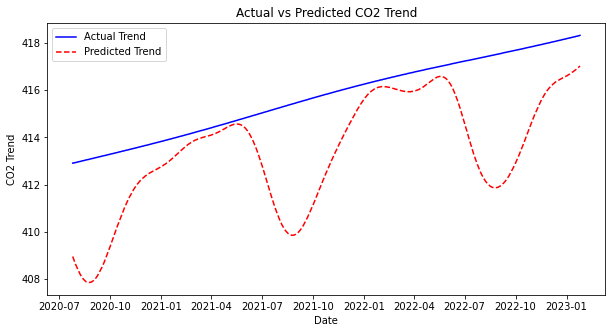

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data.drop(columns=['Unnamed: 0', 'year', 'month', 'day'], inplace=True)  # Keep 'cycle' and 'trend'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)

# Scaling the features and setting up the SVR model
scaler = StandardScaler()
svr_pipeline = Pipeline([
    ('scaler', scaler),
    ('svr', SVR())
])

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': [1, 10, 100],
    'svr__gamma': ['scale', 'auto']
}

# Setup for RandomizedSearchCV
random_search = RandomizedSearchCV(
    svr_pipeline, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42
)

# Train the model using 'cycle' as the feature and 'trend' as the target
X_train = train_data[['cycle']]
y_train = train_data['trend']
random_search.fit(X_train, y_train)

# Extract the best estimator and evaluate it on the test set
best_model = random_search.best_estimator_
X_test = test_data[['cycle']]
y_test = test_data['trend']
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", random_search.best_params_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plotting Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.index.to_pydatetime(), y_test.values, label='Actual Trend', color='blue')  # Convert to numpy array
plt.plot(y_test.index.to_pydatetime(), y_pred, label='Predicted Trend', color='red', linestyle='--')
plt.title('Actual vs Predicted CO2 Trend')
plt.xlabel('Date')
plt.ylabel('CO2 Trend')
plt.legend()
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'svr__gamma': 0.001, 'svr__C': 10}
Mean Squared Error: 9.174555032571895
R² Score: -2.554351544497443


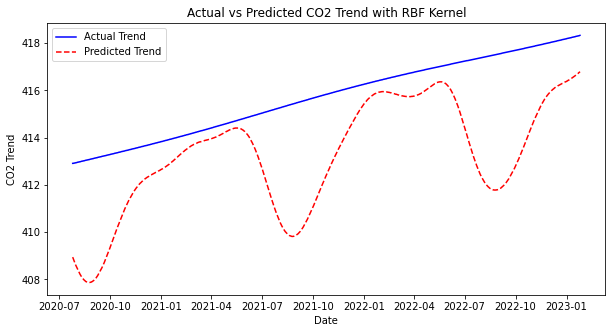

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare the dataset
file_path = 'Daily atmospheric CO2 concentration.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
data.drop(columns=['Unnamed: 0', 'year', 'month', 'day'], inplace=True)  # Keep 'cycle' and 'trend'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)

# Scaling the features and setting up the SVR model with RBF kernel
scaler = StandardScaler()
svr_pipeline = Pipeline([
    ('scaler', scaler),
    ('svr', SVR(kernel='rbf'))
])

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': [0.001, 0.01, 0.1, 1]
}

# Setup for RandomizedSearchCV
random_search = RandomizedSearchCV(
    svr_pipeline, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42
)

# Train the model using 'cycle' as the feature and 'trend' as the target
X_train = train_data[['cycle']]
y_train = train_data['trend']
random_search.fit(X_train, y_train)

# Extract the best estimator and evaluate it on the test set
best_model = random_search.best_estimator_
X_test = test_data[['cycle']]
y_test = test_data['trend']
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", random_search.best_params_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plotting Predictions vs Actual
plt.figure(figsize=(10, 5))
plt.plot(y_test.index.to_pydatetime(), y_test.values, label='Actual Trend', color='blue')  # Convert to numpy array
plt.plot(y_test.index.to_pydatetime(), y_pred, label='Predicted Trend', color='red', linestyle='--')
plt.title('Actual vs Predicted CO2 Trend with RBF Kernel')
plt.xlabel('Date')
plt.ylabel('CO2 Trend')
plt.legend()
plt.show()
